# **Regresión Lineal**
En aprendizáje atuomático, la técnia de regresión lineal se basa en optimizar los parámetros necesarios para describir un conjunto de datos.
![](https://www.iartificial.net/wp-content/uploads/2018/12/ejemplo-error-cuadratico-medio2.webp)
La línea roja es definida por:
\begin{align}
        y = m\cdot x + b
\end{align}

El error de predicción del modelo es medido por el error medio cuadrático (MSE o SMD)
![](https://lh4.googleusercontent.com/YpZaHy2Nyz4pP01Sb51iYKSHuDLuvxh1BDgWho4jk3WlBuWNDUd5AdmA3rPD_8jVZ430cjuwGZbhBAE2hAoNITazepO2hxudbyAHbMrKkf0jIGEuVUvJfkjtkElV4SNLMLkLcrIJsKfnVm7Lxw)

\begin{align}
        MSE = \frac{1}{M}\sum_{i=1}^{M}(real_i - estimado_i)^2
\end{align}

A continuación crearemos un conjunto de datos aleatorios que obedezcan una relación lineal de la forma:
\begin{align}
        y = 0.1\cdot x + 1.25 + N_{0.2}
\end{align} 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 

def funcion(a):  # función f(x) = 0.1*x + 1.25 + 0.2*Ruido_Gaussiano
    np.random.seed(12) 
    y = 0.1*a + 1.25 + 0.2*np.random.randn(a.shape[0])
    return y
x = np.arange(0, 20, 0.5) 
y = linea(x) 

plt.scatter(x,y, color='red')
plt.title('Datos aleatorios');

In [40]:
from sklearn.linear_model import LinearRegression 
regresion_lineal = LinearRegression()
regresion_lineal.fit(x.reshape(-1,1), y) 
print('m = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

m = [0.09228233], b = 1.2731974678311215


Consideramos la predicción del modelo


In [41]:
nuevo_x = np.array([5]) 
prediccion = regresion_lineal.predict(nuevo_x.reshape(-1,1))
print(prediccion)

[1.73460909]


Evaluando la calidad de la regresión con el error cuadrático medio

In [43]:
from sklearn.metrics import mean_squared_error
prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))
mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

Error Cuadrático Medio (MSE) = 0.04130795031281039
Raíz del Error Cuadrático Medio (RMSE) = 0.2032435738536655


In [44]:
r2 = regresion_lineal.score(x.reshape(-1,1), y)
print('Coeficiente de Determinación R2 = ' + str(r2))

Coeficiente de Determinación R2 = 0.872897877906948


Ahora entrenaremos un modelo de regresión lineal y compara

In [ ]:
!pip install pydataset

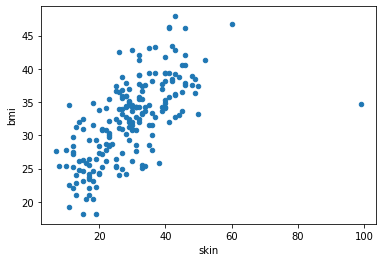

In [13]:
import pandas as pd
import numpy as np
import sklearn.linear_model as LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pydataset import data

pima = data('Pima.tr')
pima.plot(kind='scatter', x='skin', y='bmi')
plt.show()

Creamos conjuntos de datos de entrenamiento y prueba utilizando split (dividir), aproximadamente 70% entrenamiento y 30% prueba

In [14]:
X_train, X_test, y_train, y_test = train_test_split(pima.skin, pima.bmi)

veamos cómo luce el conjunto de datos de entrenamiento (rojo) y prueba (verde)

Text(0.5, 1.0, 'Datos divididos')

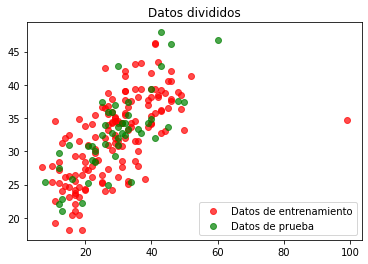

In [20]:
plt.scatter(X_train, y_train, label='Datos de entrenamiento', color='r', alpha=0.7)
plt.scatter(X_test, y_test, label='Datos de prueba', color='g', alpha=0.7)
plt.legend()
plt.title('Datos divididos')

Creamos el modelo de regresión lineal y lo entrenamos con los datos anteriormente seleccionados como conjunto de entrenamiento

In [30]:
import sklearn
LR = sklearn.linear_model.LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values )

LinearRegression()

Ahora que el modelo está entrenado, podemos ponerlo a prueba

In [ ]:
prediction = LR.predict(X_test.values.reshape(-1,1))

plt.plot(X_test, prediction, label='modelo de RL', color='b')
plt.scatter(X_test, y_test, label='Datos reales', color='g', alpha=0.8)
plt.legend()


In [ ]:
LR.predict(np.array([[30]]))[0]

Puntuación del modelo

In [36]:
LR.score(X_test.values.reshape(-1,1), y_test.values)

0.53893555418846

# **Regresión Logística**
La regresión logística estima la probabilidad de que un evento ocurra, basado en un conjunto de datos dado. Dbido a que el resultado de la regresión es una probabilidad, este valor debe estar entre 0 y 1

In [46]:
from pydataset import data
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Usaremos datos del accidente del Titanic para estimar la probabilidad de vida

In [ ]:
titanic = data('titanic')
titanic.sample

In [ ]:
titanic = pd.get_dummies(titanic, drop_first=True)
titanic.sample(5)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('survived_yes', axis=1), titanic['survived_yes'])

In [54]:
LogReg = LogisticRegression(solver='lbfgs')
LogReg.fit(X_train, y_train)

LogisticRegression()

In [55]:
LogReg.predict(np.array([[0,0,1,1]]))[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


1

In [56]:
LogReg.score(X_test, y_test)

0.7811550151975684